In [6]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np 




## Creating the connection to the database
mydb = mysql.connector.connect(
  host="localhost",
  user="johne",
  password="jognrocks1",
  database= "Happiness"
)

mycursor = mydb.cursor()

In [7]:
df = pd.read_csv("C:\\Users\\johne\\Desktop\\ERGO\\data\\archive (1)\\world-happiness-report-2021.csv")
df2 = pd.read_csv("C:\\Users\\johne\\Desktop\\ERGO\\data\\archive (1)\\world-happiness-report.csv")

In [10]:
#combining both datasets
res = [df,df2]
maindf = pd.concat(res)
maindf.head()

,Country,Year,Region,Ladder,Economic_Health,Social_Support,Life_Expectancy,Freedom_to_make_life_choices,Generosity,Corruption,Positive_affect,Negative_affect
0,Finland,2021,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,NaN,NaN
1,Denmark,2021,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,NaN,NaN
2,Switzerland,2021,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,NaN,NaN
3,Iceland,2021,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,NaN,NaN
4,Netherlands,2021,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,NaN,NaN


In [11]:
## Wrangling the data and adding a country ID column 

maindf['CountryId'] = pd.factorize(maindf['Country'])[0]

In [17]:
#maindf.to_csv('Happiness_Report_Concat.csv')

In [52]:
## Getting a unique countries dataframe
d = maindf[['Country', 'CountryId']]
d.reset_index
d.drop_duplicates(keep='first', inplace = True)

<ipython-input-52-15fb06f36e65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop_duplicates(keep='first', inplace = True)


In [57]:
d.shape

(166, 2)

In [58]:
#d.to_csv('Countries.csv')

Ladder Score = Subjective-well-being (ladder from steps 0 - 10).
The top of the ladder is best possible life


social support =  having someone to count on

freedom to make life choices = "are you satisfied with your freedom to choose what to do with your life?"

generosity = "have you donated to chairty in the past month?"



corruption perception = is corruption widesperad in your country
positive effect = did you experience 'happiness, laugh, enjoyment" today?
negative affect = did you expereince "worry, sadness, anger"


In [67]:
sql = 'Select C.Country,S.Year, S.Ladder From stats S join countries C ON C.CountryId=S.CountryId WHERE S.Year = 2021 ORDER BY Ladder DESC;'

In [68]:
pd.read_sql(sql, mydb)

,Country,Year,Ladder
0,Finland,2021,7.842
1,Denmark,2021,7.620
2,Switzerland,2021,7.571
3,Iceland,2021,7.554
4,Netherlands,2021,7.464
...,...,...,...
144,Lesotho,2021,3.512
145,Botswana,2021,3.467
146,Rwanda,2021,3.415
147,Zimbabwe,2021,3.145


In [354]:

sql = 'Select ladder, economic_health, social_support, freedom_to_make_life_choices, generosity, corruption, positive_affect, negative_affect, life_expectancy from stats order by positive_affect desc;'
dat = pd.read_sql(sql, mydb)
dat.describe()

,ladder,economic_health,social_support,freedom_to_make_life_choices,generosity,corruption,life_expectancy
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,5.452041,9.328915,0.810520,0.743653,-0.001872,0.749219,63.360022
std,1.131143,1.158199,0.121138,0.141286,0.161176,0.185398,7.624643
min,2.375000,6.635000,0.290000,0.258000,-0.335000,0.035000,32.300000
25%,4.609000,8.399000,0.741000,0.649000,-0.112000,0.695000,58.300000
50%,5.371000,9.460000,0.834000,0.763000,-0.027000,0.804000,65.200000
75%,6.255000,10.291000,0.907000,0.857000,0.088000,0.871000,68.800000
max,7.971000,11.648000,0.987000,0.985000,0.689000,0.983000,77.100000


In [355]:
### Cutting ladder score into groups

#cat = pd.cut(dat.ladder, bins=[2, 4.5, 5.5, 6.5, 8], labels=['low', 'medium', 'high', 'very_high'])

In [356]:
#dat['Ladder_Groups'] = cat
#dat.head()

In [357]:
## Loading libraries

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Modeling the data

In [358]:
train, test = train_test_split(dat, train_size = 0.8, random_state = 3)

lm = LinearRegression()

## Economic Health
X_train = np.array(train['economic_health'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


LinearRegression()

In [359]:
X_test = np.array(test['economic_health'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)

In [360]:
# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['economic_health']],dat['ladder'],cv=5).mean(),'.3f'))


In [361]:
#Data frame with essential metrics
evaluation = pd.DataFrame({'Model': [],
                          'Predictor': [],
                          'RMSE' : [],
                          'Adjusted R-Squared (train)' : [],
                          'Adjusted R-Squared (test)' : [],
                          '5 Fold Cross Validation': []
                          })
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation


In [362]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','economic_health',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409


In [363]:
# Social_Support
X_train = np.array(train['social_support'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


X_test = np.array(test['social_support'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)


# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['social_support']],dat['ladder'],cv=5).mean(),'.3f'))

In [364]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','social_support',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236


In [365]:
#freedom to make choices
X_train = np.array(train['freedom_to_make_life_choices'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


X_test = np.array(test['freedom_to_make_life_choices'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)


# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['freedom_to_make_life_choices']],dat['ladder'],cv=5).mean(),'.3f'))

In [366]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','freedom_to_make_life_choices',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076


In [367]:
# generosity
X_train = np.array(train['generosity'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


X_test = np.array(test['generosity'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)


# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['generosity']],dat['ladder'],cv=5).mean(),'.3f'))

In [368]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','generosity',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076
3,Simple Linear Regression,generosity,1.109,0.031,0.016,-0.499


In [369]:
## Perceptions of Corruption
X_train = np.array(train['corruption'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


X_test = np.array(test['corruption'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)


# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['corruption']],dat['ladder'],cv=5).mean(),'.3f'))

In [370]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','corruption',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076
3,Simple Linear Regression,generosity,1.109,0.031,0.016,-0.499
4,Simple Linear Regression,corruption,0.979,0.191,0.233,-0.212


In [372]:
# Life expectancy
X_train = np.array(train['life_expectancy'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train['ladder'], dtype = pd.Series)

lm.fit(X_train, y_train)


X_test = np.array(test['life_expectancy'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test['ladder'], dtype = pd.Series)
pred = lm.predict(X_test)


# ROOT MEAN SQAURED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,dat[['life_expectancy']],dat['ladder'],cv=5).mean(),'.3f'))

In [373]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','life expectancy',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076
3,Simple Linear Regression,generosity,1.109,0.031,0.016,-0.499
4,Simple Linear Regression,corruption,0.979,0.191,0.233,-0.212
5,Simple Linear Regression,life expectancy,0.685,0.557,0.625,0.329


In [374]:
## Multiple linear regression
columns = ['economic_health','social_support','freedom_to_make_life_choices','generosity','corruption', 'life_expectancy']
lm.fit(train[columns], train['ladder'])

pred = lm.predict(test[columns])

In [375]:
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test['ladder'],pred)),'.3f'))
rtrcm = float(format(lm.score(
                        train[columns],
                        train['ladder']),'.3f'))
rtecm = float(format(lm.score(
                        test[columns],
                        test['ladder']),'.3f'))

cv = float(format(cross_val_score(lm,
                    dat[columns],
                    dat['ladder'],cv=5).mean(),'.3f'))

In [376]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression','All Predictors',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076
3,Simple Linear Regression,generosity,1.109,0.031,0.016,-0.499
4,Simple Linear Regression,corruption,0.979,0.191,0.233,-0.212
5,Simple Linear Regression,life expectancy,0.685,0.557,0.625,0.329
6,Multiple Linear Regression,All Predictors,0.685,0.557,0.625,0.617


In [377]:
## Random Forests Regression
train_data_dm,test_data_dm = train_test_split(dat,train_size = 0.8,random_state=3)

rm = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=20, min_samples_split=40)

In [378]:

## modeling
r_model = rm.fit(train_data_dm[columns], train_data_dm['ladder'])

## predicting
pred = r_model.predict(test_data_dm[columns])

In [379]:
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['ladder'],pred)),'.3f'))
rtrcm = float(format(r_model.score(
                        train_data_dm[columns],
                        train_data_dm['ladder']),'.3f'))

rtecm = float(format(r_model.score(
                        test_data_dm[columns],
                        test_data_dm['ladder']),'.3f'))

cv = float(format(cross_val_score(r_model,
                    dat[columns],
                    dat['ladder'],cv=5).mean(),'.3f'))

In [380]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forests Regression','All Predictors',rmse,rtrsm,rtesm,cv]
evaluation

,Model,Predictor,RMSE,Adjusted R-Squared (train),Adjusted R-Squared (test),5 Fold Cross Validation
0,Simple Linear Regression,economic_health,0.675,0.627,0.636,0.409
1,Simple Linear Regression,social_support,0.789,0.516,0.502,0.236
2,Simple Linear Regression,freedom_to_make_life_choices,0.942,0.276,0.290,-0.076
3,Simple Linear Regression,generosity,1.109,0.031,0.016,-0.499
4,Simple Linear Regression,corruption,0.979,0.191,0.233,-0.212
5,Simple Linear Regression,life expectancy,0.685,0.557,0.625,0.329
6,Multiple Linear Regression,All Predictors,0.685,0.557,0.625,0.617
7,Random Forests Regression,All Predictors,0.685,0.557,0.625,0.675


In [381]:
## Visualize the tree

In [382]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
rm.estimators_[0].tree_.max_depth

5

In [383]:
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(rm.estimators_[0], feature_names=columns, filled=True)

In [384]:
plt.rcParams['font.family'] = "serif"

Text(0.5, 1.0, 'Feature Importance for Predicting Ladder Score')

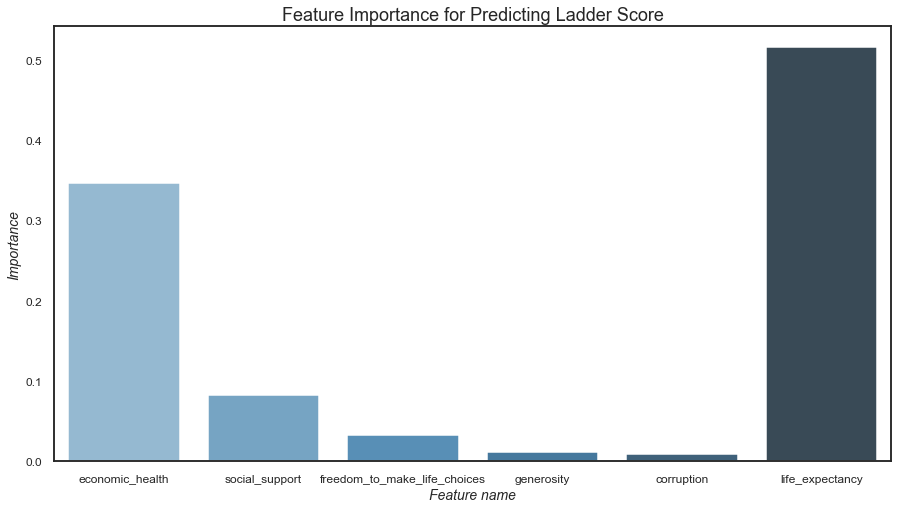

In [385]:
fimp = rm.feature_importances_
feature_importance = pd.DataFrame({'Feature Name': columns, 'Importance': fimp})

sns.set_style('white')
sns.set_context('talk')
fig, ax = plt.subplots(1, figsize=(15,8))
sns.barplot(x='Feature Name', y='Importance', data = feature_importance, ax=ax, palette=('Blues_d'))


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Feature name',fontsize=14,fontstyle='italic')
plt.ylabel('Importance',fontsize=14,fontstyle='italic')
plt.title('Feature Importance for Predicting Ladder Score', weight=500)



Playing with past data

In [318]:
sql = 'select c.Country, s.ladder, s.Year, s.Positive_affect, s.Negative_affect from Countries c join Stats s on c.CountryId=s.CountryId ORDER BY ladder DESC;'
td = pd.read_sql(sql, mydb)

In [319]:
td.head()

,Country,ladder,Year,Positive_affect,Negative_affect
0,Denmark,7.971,2008,0.757,0.163
1,Finland,7.889,2020,0.7440000000000001,0.193
2,Finland,7.858,2018,0.782,0.182
3,Finland,7.842,2021,,
4,Denmark,7.834,2007,0.828,0.19399999999999998


In [320]:
td.isnull().any()
#td.fillna(td.mean(), inplace=True)
#td.head()
td['Positive_affect'] = pd.to_numeric(td['Positive_affect'])
td['Negative_affect'] = pd.to_numeric(td['Negative_affect'])
td = td.dropna()

In [322]:
train_af, test_af = train_test_split(td, train_size = 0.8, random_state = 3)


X_train = np.array(train_af['Positive_affect'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_af['ladder'], dtype = pd.Series)


X_test = np.array(test_af['Positive_affect'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_af['ladder'], dtype = pd.Series)
#names = ['Positive_affect', 'Negative_affect']
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

In [324]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))

# R-SQUARED TRAIN
rtrsm = float(format(lm.score(X_train, y_train),'.3f'))


#R SQUARED TEST
rtesm = float(format(lm.score(X_test, y_test),'.3f'))


cv = float(format(cross_val_score(lm,td[['Positive_affect']],td['ladder'],cv=5).mean(),'.3f'))

In [325]:
rmsecm, rtrcm, rtecm, cv

(0.976, 0.296, 0.303, -16.505)